In [12]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [13]:
import cv2
import numpy as np

for i in range(0,6):
    random_num= np.random.randint(0,len(X_train))
    img =X_train[random_num]
    window_name='Random Sample #'+str(i)
    cv2.imshow(window_name,img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

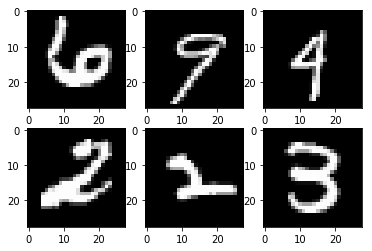

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(231)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(232)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(233)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(234)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(235)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(236)
random_num=np.random.randint(0,len(X_train))
plt.imshow(X_train[random_num],cmap=plt.get_cmap('gray'))

plt.show()

In [15]:
img_rows = X_train[0].shape[0]
img_cols = X_train[0].shape[1]

X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255
X_test /=255

print('X_train shape',X_train.shape)
print(X_train.shape[0],' train samples')
print(X_test.shape[0],' test samples')

X_train shape (60000, 28, 28, 1)
60000  train samples
10000  test samples


In [16]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print("Num of classes: "+str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = X_train.shape[1]*X_train.shape[2]

print('Total pixels',num_pixels)

Num of classes: 10
Total pixels 784


In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import  SGD

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
________

In [22]:
batch_size=32
epochs=10
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))
score=model.evaluate(X_test,y_test,verbose=0)
print('Test Loss',score[0])
print('Test accuracy',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 42031s 701ms/step - loss: 0.0818 - acc: 0.9757 - val_loss: 0.0413 - val_acc: 0.9859
Epoch 2/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0779 - acc: 0.9761 - val_loss: 0.0432 - val_acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 55s 923us/step - loss: 0.0702 - acc: 0.9783 - val_loss: 0.0377 - val_acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 56s 930us/step - loss: 0.0703 - acc: 0.9788 - val_loss: 0.0379 - val_acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 56s 928us/step - loss: 0.0631 - acc: 0.9807 - val_loss: 0.0368 - val_acc: 0.9867
Epoch 6/10
60000/60000 [==============================] - 55s 910us/step - loss: 0.0608 - acc: 0.9814 - val_loss: 0.0356 - val_acc: 0.9877
Epoch 7/10
60000/60000 [==============================] - 54s 901us/step - loss: 0.0577 - acc: 0.9822 - val_loss: 0

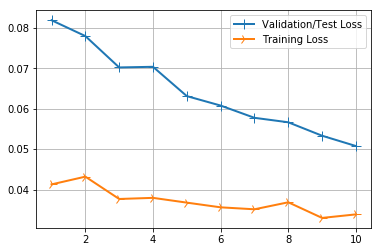

In [26]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,val_loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.grid(True)
plt.legend()
plt.show()

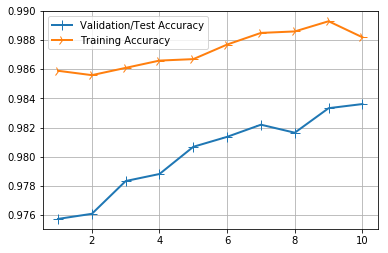

In [27]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['acc']
val_loss_values=history_dict['val_acc']

epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,loss_values,label='Validation/Test Accuracy')
line2=plt.plot(epochs,val_loss_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.grid(True)
plt.legend()
plt.show()

In [1]:
model.save('mnist_simple_cnn_10epochs.h5')

NameError: name 'model' is not defined

In [2]:
from keras.models import load_model
classifier=load_model('mnist_simple_cnn_10epochs.h5')

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
from keras.utils.vis_utils import plot_model
from keras import backend
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import  SGD
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


input_shape=(28,28,1)
num_classes=10

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

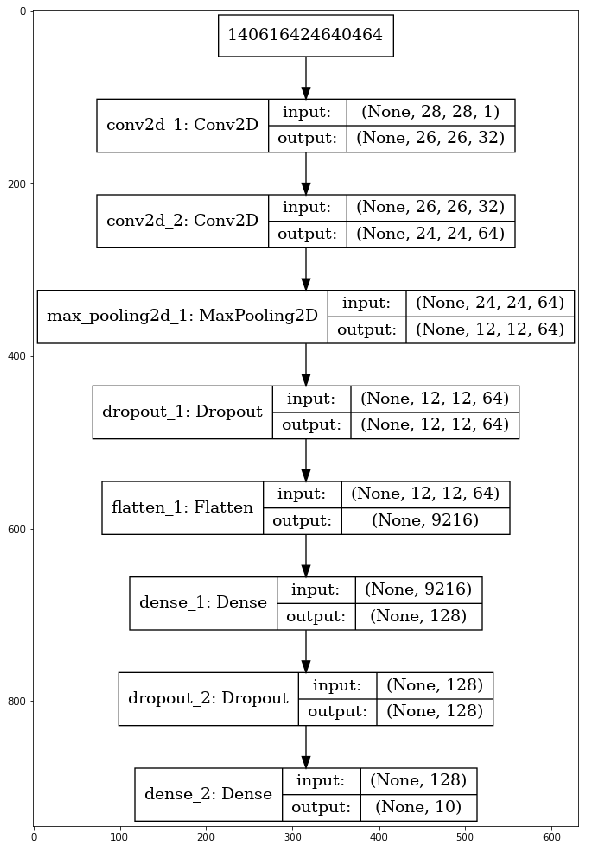

In [5]:
plot_model(model,to_file='mnist_simple_cnn_10epochs.png',show_shapes=True,show_layer_names=True)
img=mpimg.imread('mnist_simple_cnn_10epochs.png')
plt.figure(figsize=(30,15))
plt.imshow(img)
